#📌 Extracción

### 1.- Cargando los datos.###

In [1]:
#Importando
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

### 2- Mostrando los datos.####

In [3]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## 1.- Explorando los datos.##

#### a.- Explorar las columnas del dataset y verificar sus tipos de datos.####

✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.shape

(7267, 6)

In [6]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


#### b.- Normalizar las columnas.####

In [7]:
#Normalizar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

#Eliminar las columnas anidadas originales del DataFrame
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

#Concatenar el DataFrame original con los nuevos datos normalizados
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

#Verificar los cambios
df.head()



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

####c.- Renombrar nombres de columnas.####

In [9]:
df.rename(columns={
    'customerID': 'id',
    'Churn':'cancelado',
    'gender': 'genero',
    'SeniorCitizen': 'mayor65',
    'Partner': 'tienePareja',
    'Dependents': 'tieneDependentes',
    'tenure': 'mesesContrato',
    'PhoneService': 'servicioTelefonico',
    'MultipleLines': 'lineasMultiples',
    'InternetService': 'servicioInternet',
    'OnlineSecurity': 'seguridadLinea',
    'OnlineBackup': 'SoporteLinea',
    'DeviceProtection': 'proteccionDispositivos',
    'TechSupport': 'soporteTecnico',
    'StreamingTV': 'servicioTv',
    'StreamingMovies': 'servicioPeliculas',
    'PaperlessBilling': 'facturasElectronicas',
    'PaymentMethod': 'metodoPago',
    'Contract': 'tipoContrato',
    'Charges.Monthly': 'gastosMensuales',
    'Charges.Total': 'gastosTotales'
}, inplace=True)

In [10]:
df.tail()

,id,cancelado,genero,mayor65,tienePareja,tieneDependentes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7267 non-null   object 
 1   cancelado               7267 non-null   object 
 2   genero                  7267 non-null   object 
 3   mayor65                 7267 non-null   int64  
 4   tienePareja             7267 non-null   object 
 5   tieneDependentes        7267 non-null   object 
 6   mesesContrato           7267 non-null   int64  
 7   servicioTelefonico      7267 non-null   object 
 8   lineasMultiples         7267 non-null   object 
 9   servicioInternet        7267 non-null   object 
 10  seguridadLinea          7267 non-null   object 
 11  SoporteLinea            7267 non-null   object 
 12  proteccionDispositivos  7267 non-null   object 
 13  soporteTecnico          7267 non-null   object 
 14  servicioTv              7267 non-null   

####d.- Comprobación de incoherencias en los datos   ####

In [12]:
#Buscando valores ausentes.
df.isnull().sum()

,0
id,0
cancelado,0
genero,0
mayor65,0
tienePareja,0
tieneDependentes,0
mesesContrato,0
servicioTelefonico,0
lineasMultiples,0
servicioInternet,0


In [13]:
#Busando Strings vacios.
(df['cancelado'] == '').sum()

np.int64(224)

In [14]:
(df['gastosTotales'] == ' ').sum()

np.int64(11)

#### e.- Manejo de inconsistencias.####

In [15]:
df['cancelado'] = df['cancelado'].replace('', np.nan)
df['gastosTotales'] = df['gastosTotales'].replace(' ', np.nan)

In [16]:
int((df['cancelado'] == '').sum())

0

In [17]:
(df['gastosTotales'] == ' ').sum()

np.int64(0)

In [18]:
df.isnull().sum()

,0
id,0
cancelado,224
genero,0
mayor65,0
tienePareja,0
tieneDependentes,0
mesesContrato,0
servicioTelefonico,0
lineasMultiples,0
servicioInternet,0


In [19]:
df = df.dropna(subset=['cancelado', 'gastosTotales'])

In [20]:
df[['cancelado', 'gastosTotales']].isnull().sum()

,0
cancelado,0
gastosTotales,0


In [21]:
#Verificando que no hay duplicados.
df.duplicated().sum()

np.int64(0)

In [22]:
#Corrigiendo tipos de datos de las columnas.
#Convirtiendo gastosTotales a float.
df.loc[:,'gastosTotales'] = df['gastosTotales'].astype(np.float64)

#Convertir variables a string.
variables_a_str = ['id', 'genero', 'servicioInternet', 'tipoContrato', 'metodoPago']
df.loc[:, variables_a_str] = df[variables_a_str].astype(str)

#Convertir variables a boolean
variables_a_boolean = ['cancelado','mayor65', 'tienePareja', 'tieneDependentes', 'facturasElectronicas']
df.loc[:, variables_a_boolean] = df[variables_a_boolean].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

#Convertir variables a categoricas.

variables_a_categoricas = ['lineasMultiples', 'seguridadLinea', 'SoporteLinea', 'proteccionDispositivos', 'soporteTecnico', 'servicioTv', 'servicioPeliculas']
df.loc[:, variables_a_categoricas] = df[variables_a_categoricas].astype('category')

/tmp/ipython-input-4112122167.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, variables_a_boolean] = df[variables_a_boolean].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


In [23]:
df.head()

,id,cancelado,genero,mayor65,tienePareja,tieneDependentes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,SoporteLinea,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.3
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.4


In [24]:
df.duplicated().sum()

np.int64(0)

####f.- Columna de cuentas diarias.   ####

In [25]:

df['gastosDiario'] = df['gastosMensuales'].astype(float) / 30

In [26]:
df.head()

,id,cancelado,genero,mayor65,tienePareja,tieneDependentes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales,gastosDiario
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.4,2.796667


In [27]:
print('----------------------------')
print("Estadísticas descriptivas\nde Cuentas Diarias:")
print('----------------------------')
print(df['gastosDiario'].describe().round(2))

----------------------------
Estadísticas descriptivas
de Cuentas Diarias:
----------------------------
count    7032.00
mean        2.16
std         1.00
min         0.61
25%         1.19
50%         2.34
75%         3.00
max         3.96
Name: gastosDiario, dtype: float64


#### g.- Estandarización y transformación de datos ####

In [28]:
df[variables_a_boolean] = df[variables_a_boolean].astype(int)

In [29]:
df[variables_a_boolean].head()

,cancelado,mayor65,tienePareja,tieneDependentes,facturasElectronicas
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [30]:
df

,id,cancelado,genero,mayor65,tienePareja,tieneDependentes,mesesContrato,servicioTelefonico,lineasMultiples,servicioInternet,...,proteccionDispositivos,soporteTecnico,servicioTv,servicioPeliculas,tipoContrato,facturasElectronicas,metodoPago,gastosMensuales,gastosTotales,gastosDiario
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,Yes,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   cancelado               7032 non-null   int64  
 2   genero                  7032 non-null   object 
 3   mayor65                 7032 non-null   int64  
 4   tienePareja             7032 non-null   int64  
 5   tieneDependentes        7032 non-null   int64  
 6   mesesContrato           7032 non-null   int64  
 7   servicioTelefonico      7032 non-null   object 
 8   lineasMultiples         7032 non-null   object 
 9   servicioInternet        7032 non-null   object 
 10  seguridadLinea          7032 non-null   object 
 11  SoporteLinea            7032 non-null   object 
 12  proteccionDispositivos  7032 non-null   object 
 13  soporteTecnico          7032 non-null   object 
 14  servicioTv              7032 non-null   objec

#📊 Carga y análisis

In [32]:
df.describe()

,cancelado,mayor65,tienePareja,tieneDependentes,mesesContrato,facturasElectronicas,gastosMensuales,gastosDiario
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,3.958333


In [33]:
print(df["cancelado"].value_counts())

cancelado
0    5163
1    1869
Name: count, dtype: int64


####1.- Distribucion por abandono de contrato.####

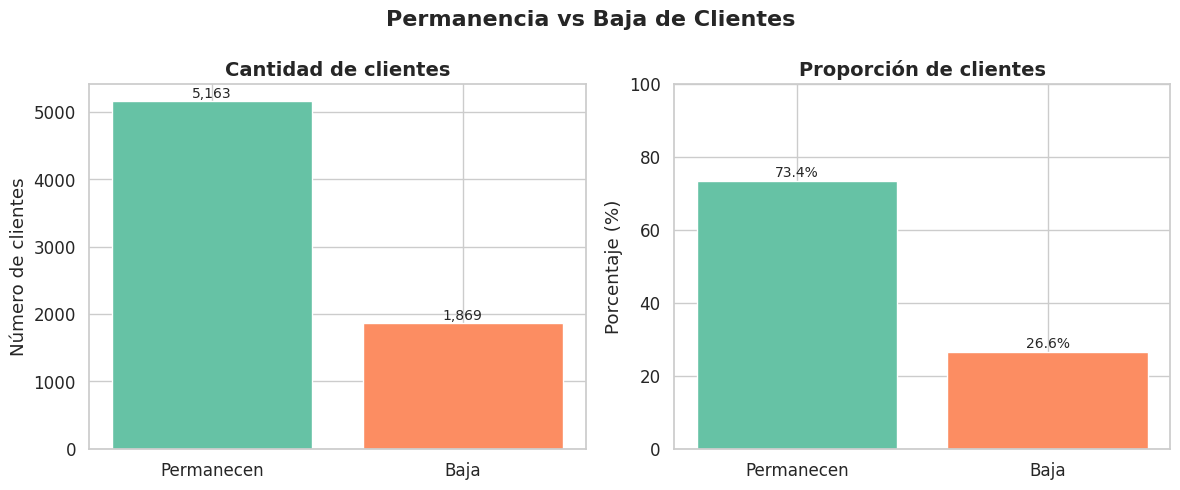

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo profesional
sns.set_theme(style="whitegrid", font_scale=1.1)

# Datos absolutos y porcentuales
conteo_abs = df['cancelado'].value_counts().sort_index()
conteo_pct = df['cancelado'].value_counts(normalize=True).sort_index() * 100

# Etiquetas
etiquetas = ['Permanecen', 'Baja']

# Paleta de colores elegante
colores = sns.color_palette("Set2", 2)

# Crear figura con 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- Gráfico 1: Números absolutos ---
barras1 = axes[0].bar(etiquetas, conteo_abs, color=colores)
axes[0].set_title("Cantidad de clientes", fontsize=14, weight='bold')
axes[0].set_ylabel("Número de clientes")
for barra, valor in zip(barras1, conteo_abs):
    axes[0].text(barra.get_x() + barra.get_width()/2, valor + 50,
                 f'{valor:,}', ha='center', fontsize=10)

# --- Gráfico 2: Porcentajes ---
barras2 = axes[1].bar(etiquetas, conteo_pct, color=colores)
axes[1].set_title("Proporción de clientes", fontsize=14, weight='bold')
axes[1].set_ylabel("Porcentaje (%)")
axes[1].set_ylim(0, 100)
for barra, valor in zip(barras2, conteo_pct):
    axes[1].text(barra.get_x() + barra.get_width()/2, valor + 1,
                 f'{valor:.1f}%', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

####2.- Recuento de abono de contrato por variables categoricas. ####

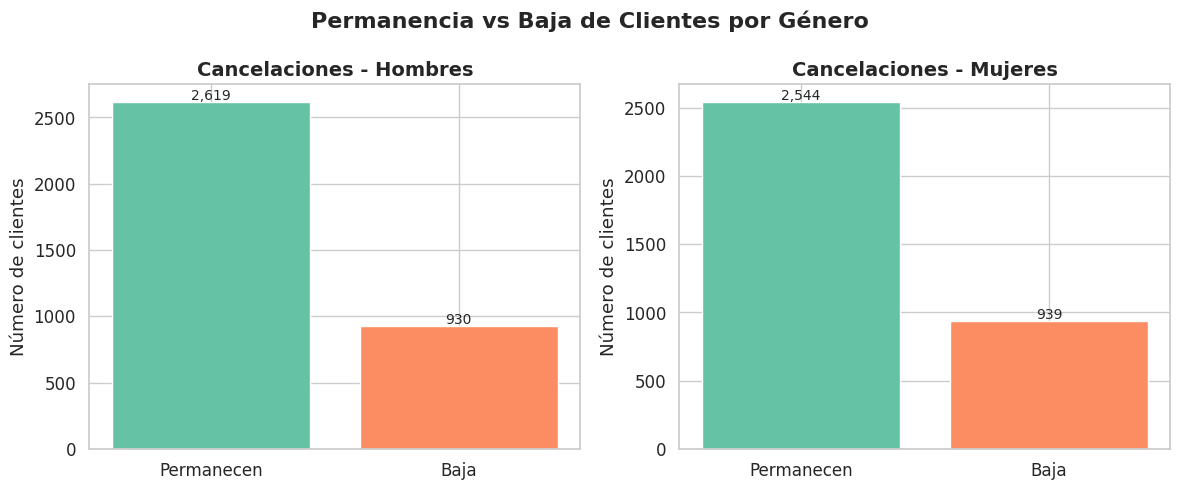

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo profesional
sns.set_theme(style="whitegrid", font_scale=1.1)

# Filtrar por género
df_hombres = df[df['genero'] == 'Male']
df_mujeres = df[df['genero'] == 'Female']

# Datos absolutos
conteo_hombres = df_hombres['cancelado'].value_counts().sort_index()
conteo_mujeres = df_mujeres['cancelado'].value_counts().sort_index()

# Etiquetas
etiquetas = ['Permanecen', 'Baja']

# Paleta de colores elegante
colores = sns.color_palette("Set2", 2)

# Crear figura con 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- Gráfico Hombres ---
barras1 = axes[0].bar(etiquetas, conteo_hombres, color=colores)
axes[0].set_title("Cancelaciones - Hombres", fontsize=14, weight='bold')
axes[0].set_ylabel("Número de clientes")
for barra, valor in zip(barras1, conteo_hombres):
    axes[0].text(barra.get_x() + barra.get_width()/2, valor + 10,
                 f'{valor:,}', ha='center', fontsize=10)

# --- Gráfico Mujeres ---
barras2 = axes[1].bar(etiquetas, conteo_mujeres, color=colores)
axes[1].set_title("Cancelaciones - Mujeres", fontsize=14, weight='bold')
axes[1].set_ylabel("Número de clientes")
for barra, valor in zip(barras2, conteo_mujeres):
    axes[1].text(barra.get_x() + barra.get_width()/2, valor + 10,
                 f'{valor:,}', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes por Género", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

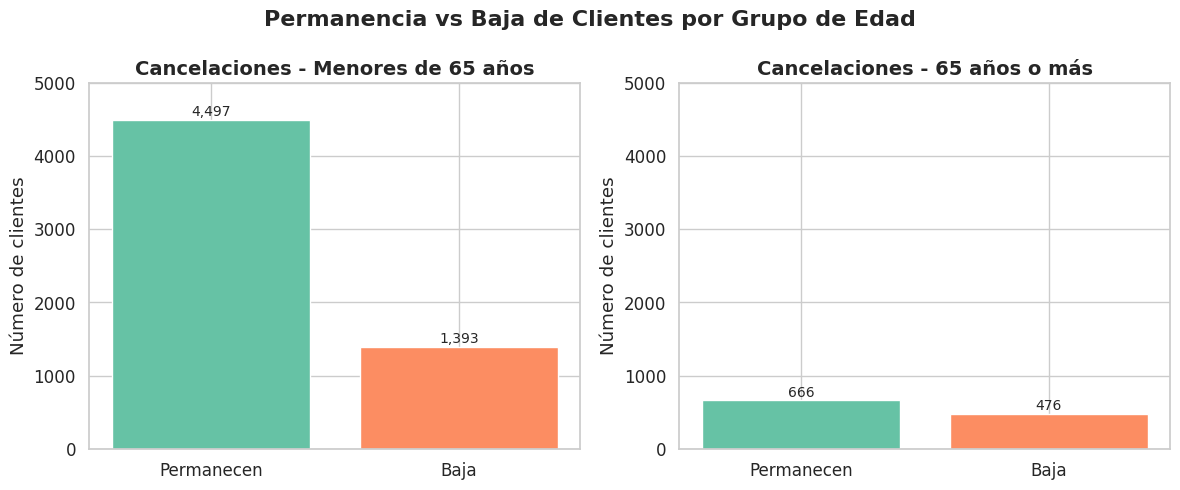

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo profesional
sns.set_theme(style="whitegrid", font_scale=1.1)

# Crear columna de grupo de edad
df['grupoEdad'] = df['mayor65'].map({0: '< 65 años', 1: '≥ 65 años'})

# Filtrar por grupo de edad
df_menor65 = df[df['grupoEdad'] == '< 65 años']
df_mayor65 = df[df['grupoEdad'] == '≥ 65 años']

# Datos absolutos
conteo_menor65 = df_menor65['cancelado'].value_counts().sort_index()
conteo_mayor65 = df_mayor65['cancelado'].value_counts().sort_index()

# Etiquetas
etiquetas = ['Permanecen', 'Baja']

# Paleta de colores elegante
colores = sns.color_palette("Set2", 2)

# Crear figura con 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- Gráfico Menores de 65 ---
barras1 = axes[0].bar(etiquetas, conteo_menor65, color=colores)
axes[0].set_title("Cancelaciones - Menores de 65 años", fontsize=14, weight='bold')
axes[0].set_ylabel("Número de clientes")
axes[0].set_ylim(0, 5000)  # Limite fijo en 5000
for barra, valor in zip(barras1, conteo_menor65):
    axes[0].text(barra.get_x() + barra.get_width()/2, valor + 50,
                 f'{valor:,}', ha='center', fontsize=10)

# --- Gráfico Mayores o iguales a 65 ---
barras2 = axes[1].bar(etiquetas, conteo_mayor65, color=colores)
axes[1].set_title("Cancelaciones - 65 años o más", fontsize=14, weight='bold')
axes[1].set_ylabel("Número de clientes")
axes[1].set_ylim(0, 5000)  # Limite fijo en 5000
for barra, valor in zip(barras2, conteo_mayor65):
    axes[1].text(barra.get_x() + barra.get_width()/2, valor + 50,
                 f'{valor:,}', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes por Grupo de Edad", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

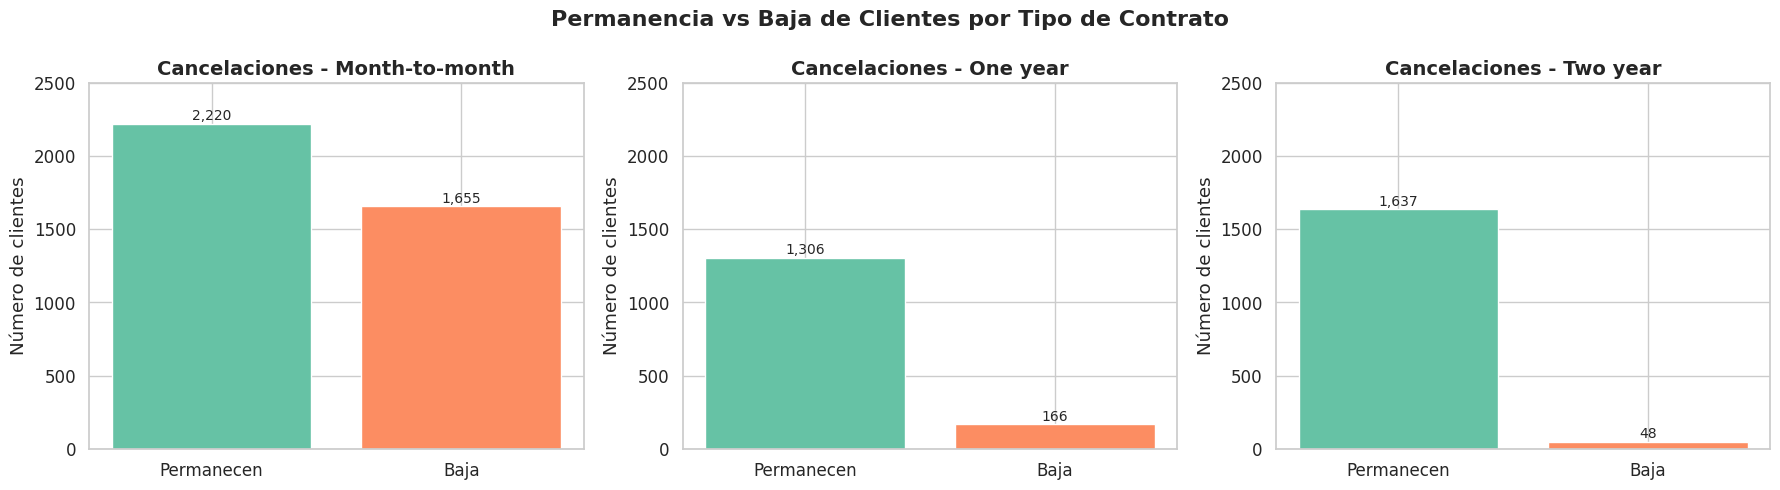

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo profesional
sns.set_theme(style="whitegrid", font_scale=1.1)

# Etiquetas para cancelación
etiquetas = ['Permanecen', 'Baja']

# Paleta de colores elegante
colores = sns.color_palette("Set2", 2)

# Tipos de contrato a graficar
tipos = ['Month-to-month', 'One year', 'Two year']

# Crear figura con 3 gráficos lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, contrato in zip(axes, tipos):
    df_contrato = df[df['tipoContrato'] == contrato]
    conteo = df_contrato['cancelado'].value_counts().sort_index()

    # Asegurar que existan ambos valores (0 = permanece, 1 = baja)
    conteo = conteo.reindex([0,1], fill_value=0)

    # Crear barras
    barras = ax.bar(etiquetas, conteo, color=colores)
    ax.set_title(f"Cancelaciones - {contrato}", fontsize=14, weight='bold')
    ax.set_ylabel("Número de clientes")
    ax.set_ylim(0, 2500)  # Escala fija hasta 2500
    for barra, valor in zip(barras, conteo):
        ax.text(barra.get_x() + barra.get_width()/2, valor + 25,
                f'{valor:,}', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes por Tipo de Contrato", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

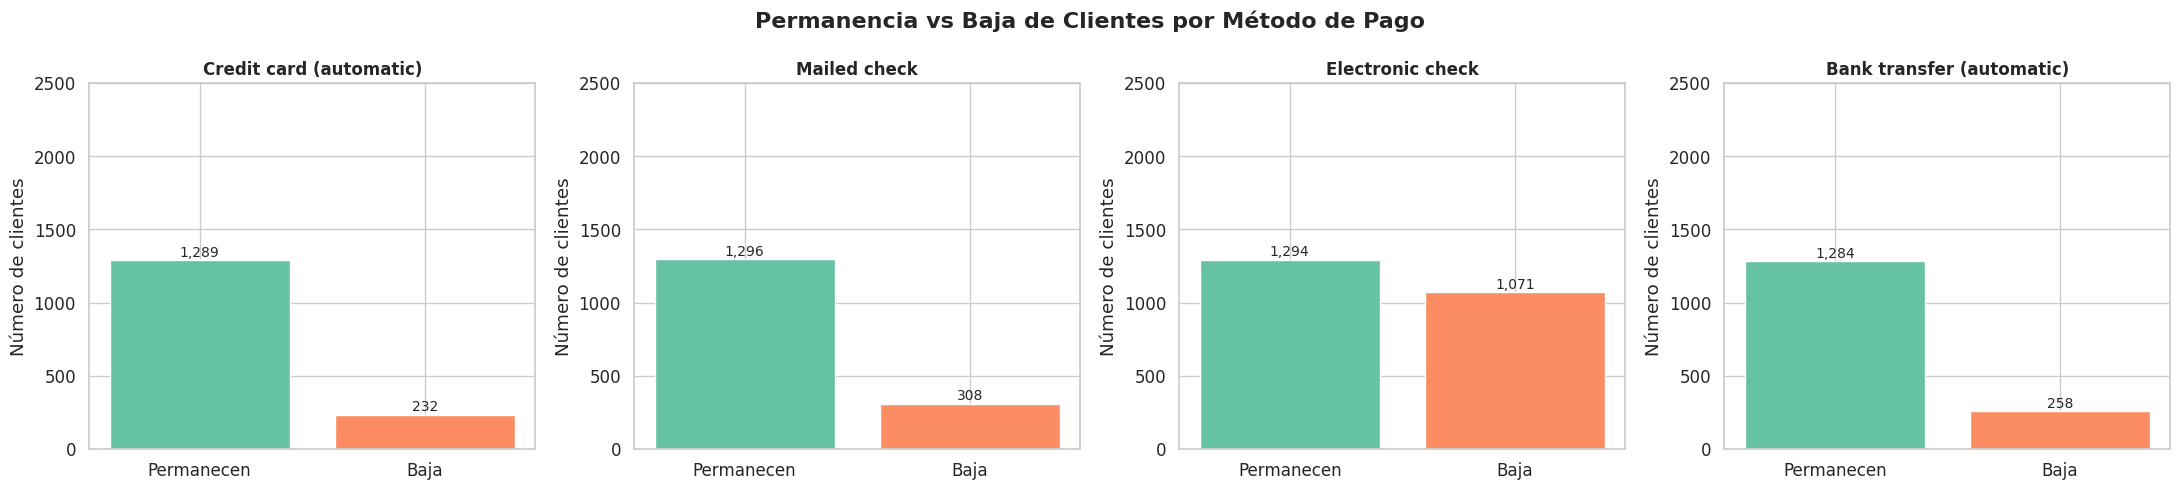

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo profesional
sns.set_theme(style="whitegrid", font_scale=1.1)

# Etiquetas para cancelación
etiquetas = ['Permanecen', 'Baja']

# Paleta de colores elegante
colores = sns.color_palette("Set2", 2)

# Métodos de pago a analizar
metodos = ['Credit card (automatic)', 'Mailed check', 'Electronic check', 'Bank transfer (automatic)']

# Crear figura con 4 gráficos lado a lado
fig, axes = plt.subplots(1, 4, figsize=(22,5))

for ax, metodo in zip(axes, metodos):
    df_metodo = df[df['metodoPago'] == metodo]
    conteo = df_metodo['cancelado'].value_counts().sort_index()

    # Asegurar que existan ambos valores (0 = permanece, 1 = baja)
    conteo = conteo.reindex([0,1], fill_value=0)

    # Crear barras
    barras = ax.bar(etiquetas, conteo, color=colores)
    ax.set_title(f"{metodo}", fontsize=12, weight='bold')
    ax.set_ylabel("Número de clientes")
    ax.set_ylim(0, 2500)  # Escala fija para comparabilidad
    for barra, valor in zip(barras, conteo):
        ax.text(barra.get_x() + barra.get_width()/2, valor + 25,
                f'{valor:,}', ha='center', fontsize=10)

# Ajustes finales
plt.suptitle("Permanencia vs Baja de Clientes por Método de Pago", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

#### 3.- Evasion por variables numericas.####

In [46]:
# Variables numericas

columnas_numericas = [['gastosMensuales','gastosTotales','gastosDiario']]

# Promedios y desviaciones por grupo
df.groupby('cancelado')[['gastosMensuales', 'gastosTotales', 'gastosDiario']].agg(['mean', 'std']).round(2)

gastosMensuales        gastosTotales          gastosDiario      
                     mean    std          mean      std         mean   std
cancelado                                                                 
0                   61.31  31.09       2555.34  2329.46         2.04  1.04
1                   74.44  24.67       1531.80  1890.82         2.48  0.82

In [47]:
columnas_numericas = columnas_numericas[0]

In [102]:
NARANJA = '#ff6347'
VERDE = '#3cb371'
GRIS = '#4D4D4D'         #
NEGRO = '#404040'

In [103]:
def boxplot_cancelacion(columnas_numericas):

  plt.figure(figsize=(15, 5))
  plt.gcf().set_facecolor('#F2F2F2')  # Fondo claro

  for i, columna in enumerate(columnas_numericas):
      plt.subplot(1, 3, i + 1)

      # Boxplot con alternancia de colores
      sns.boxplot(
      x='cancelado',
      y=columna,
      hue='cancelado',
      data=df,
      showfliers=False,
      palette=[NARANJA, VERDE],
      legend=False
     )

            # Título en GRIS
      plt.title(f'{columna.replace("_", " ").capitalize()} según cancelación', fontsize=16, color=GRIS)

      # Eje X
      plt.xlabel('Canceló', fontsize=12, color=NEGRO)
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=NEGRO)

      # Eje Y
      plt.ylabel(columna.replace('_', ' ').capitalize(), fontsize=12, color=NEGRO)
      plt.tick_params(axis='y', labelsize=12, colors=NEGRO)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt

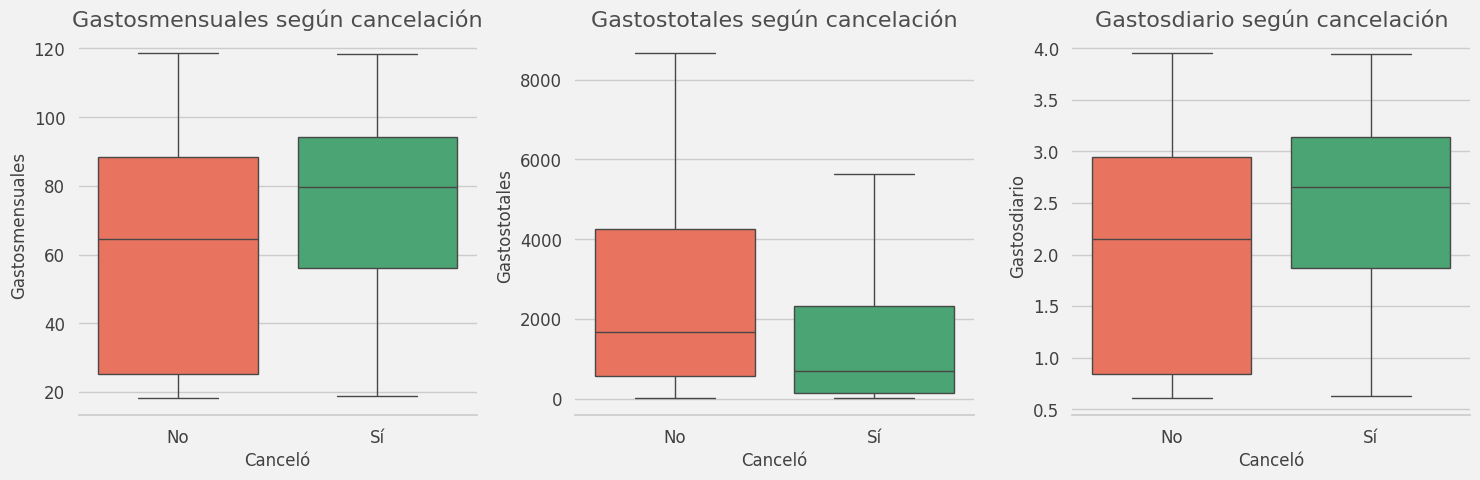

In [104]:
boxplot_cancelacion(columnas_numericas).show()

In [105]:
def cancelacion_segun_meses():

  # Boxplot para meses de contrato
  plt.figure(figsize=(10, 5))
  sns.boxplot(x='cancelado', y='mesesContrato', data=df, showfliers=False, palette=['#ff6347', '#3cb371'], hue='cancelado', legend=False)
  plt.title('Meses de contrato según cancelación', fontsize=18, color=GRIS)
  plt.xlabel('Cancelado')
  plt.ylabel('Meses de contrato')
  plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=GRIS) # Added color to x-axis ticks
  plt.tick_params(axis='y', labelsize=12, colors=GRIS) # Added color to y-axis ticks


  # Eliminar bordes superior, derecho e izquierdo
  ax = plt.gca()
  ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)


  plt.tight_layout()
  return plt

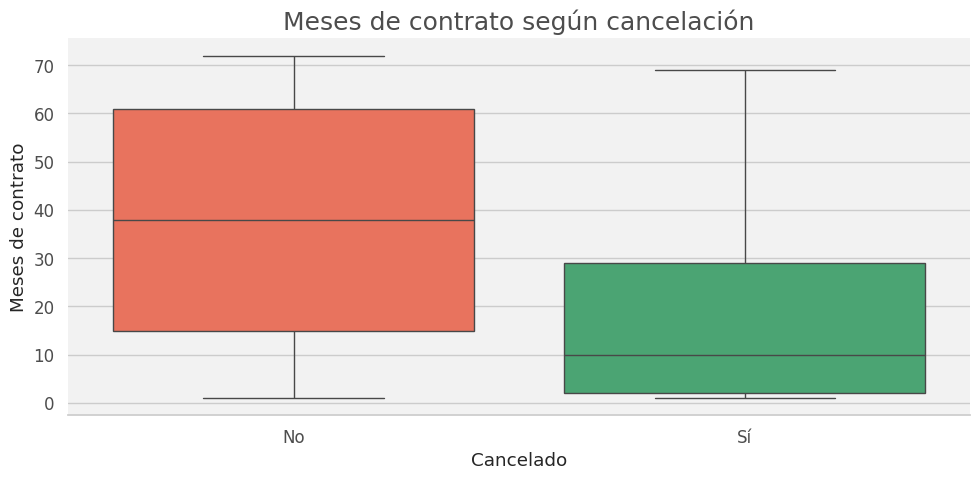

In [106]:
cancelacion_segun_meses().show()

#📄Informe final
#Telecom X - Análisis de Evasión de Clientes

#🔹 Introducción:


El analasis a continuaciona detallado contiene el estudio de los factores involucrados en el alta tasa de cancelaciones en la empresa TelecomX.

La justificacion principal que ha generado esta investigacion es la de proporcionar a la gerencia, la informacion necesaria para poder tomar las desiciones correctas que permita superar el impase de la cancelacion de cuenta por parte de los clientes.

Superando asi la dificil situacion economica que enfrenta la empresa. Logrando atraer mas clientes atravez de brindar un mejor servicio y mayor calidad en los productos ofrecidos.



#🔹Importacion y manipulacion de datos.

1.   Carga de datos: Se realizo la carga de los datos atravez de la importa del DataFrame.
2.   Se mostraron los datos: Se mostraron la estructura original de los datos.






#🔹Exploracion de los datos:



a.-   Exploracion de las columnas del dataset y verificacion de tipos de datos: Se realizo la visualizacion de las columanas y sus tipos determinado que era necesario normalizar.\
b.-   Normalizacion de las columnas: Se realizo la normalizacion en las columnaas que era necesario, generando mayor cantidad de las que se tenian al inicio.\
c.-    Renombramiento de las columnas: Luego de normalizadas las columnas, se procedio a renombrar las columnas para facilitar el analisis.\
d.-    Comprabacion de incoherencia: Se realizo la busqueda de incoherencias tratando de evitar dificultades durante el estudio.\
e.-    Manejo de inconsistencias: Se realizaron las acciones necesarios para poder superar las inconsistencias y poder continuar con el analisis.\
f.-    Columna de cuentas diarias: Calculada utilizando la facturacion mensual para calcular el valor diario, para porporcionar una vision detallada de los clientes a lo largo del tiempo.\
g.-     Estandarizacion y transformacion de datos: Se realizo para hacer mas comprensible y adecuada para el analisis.








#🔹Carga y analasis:

En esta parte del analisis se realizaron las siguientes acciones:


1.   Distribucion por abandono de contrato.
2.   Recuento de abandono de contrato por variables categoricas.
3.   Evasion por variables numericas.

Todas estas acciones con el objetivo de encontrar las razones de porque los clientes se encuentran cancelando sus contratos.





#🔹Conclusiones e Insights Analíticos

A partir del análisis exploratorio y descriptivo realizado sobre los datos de clientes de TelecomX, se identifican los siguientes hallazgos clave:

1.   **Elevada tasa de churn:** El nivel de cancelación observado es considerable y
representa un riesgo significativo para la sostenibilidad del negocio. Este indicador confirma la necesidad de estrategias de retención basadas en datos.
2.   **Mayor propensión al churn en contratos mensuales:** Los clientes con planes de corta duración presentan mayor probabilidad de abandono. La flexibilidad de este tipo de contrato incrementa la facilidad de migrar hacia competidores.
3.  ** Métodos de pago electrónicos como variable de riesgo:** Se observa una mayor incidencia de cancelaciones en clientes que utilizan medios de pago digitales. Esto sugiere la existencia de factores asociados a la experiencia de usuario o características del perfil de cliente que adoptan estos métodos.
4.   **Clientes recientes con altos cargos mensuales:** La combinación de baja antigüedad y tarifas mensuales elevadas incrementa de manera significativa la probabilidad de evasión. Este hallazgo indica que tanto la percepción de costo como la falta de compromiso con la marca son determinantes.

En conjunto, los resultados sugieren que la insatisfacción percibida, los costos asociados y la ausencia de vínculos contractuales de largo plazo constituyen los principales impulsores de la evasión en TelecomX.

#🔹Recomendaciones Estratégicas Basadas en Datos

Derivado de los insights anteriores, se proponen acciones orientadas a mitigar el churn y fortalecer la retención:



1.   **Fidelización en contratos mensuales:** Diseñar programas de beneficios e incentivos que fomenten la transición hacia planes de mayor duración (ej. descuentos escalonados, servicios premium incluidos).
2.  **Onboarding y experiencia temprana:** Establecer procesos de acompañamiento y monitoreo durante los primeros meses de servicio, identificando tempranamente señales de insatisfacción.
3.  **Revisión de la propuesta de valor para clientes de alto gasto: texto en negrita texto en negrita **Analizar mediante encuestas y modelos causales los motivos de abandono en clientes con cargos elevados. Esto podría requerir ajustar precios o reforzar el valor percibido de los planes premium.
4.   **Optimización del journey de pago electrónico:** Realizar estudios de experiencia de usuario en los métodos de pago digitales, eliminando fricciones y garantizando un proceso seguro, confiable y transparente.
5.   **Implementación de modelos predictivos de churn:** Entrenar modelos de machine learning (ej. regresión logística, random forest o gradient boosting) para identificar clientes en riesgo y habilitar intervenciones personalizadas de retención.
6.   **Captura sistemática de feedback post-churn:** Incorporar encuestas de salida estructuradas que permitan generar insights continuos y alimentar el ciclo de mejora.
















